# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  group 8

Created by Eden Kidane (017234854)  Salma Ibrahim (013934479) Jacod Timoteo
Last updated: 9/28/25  
Briefly describe your dataset

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Motor_Vehicle_Collisions_-_Crashes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "michalwierzbicki/new-york-motor-vehicle-collisions-2014-2023",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1438318661.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 78.8M/78.8M [00:01<00:00, 56.1MB/s]

Extracting zip of Motor_Vehicle_Collisions_-_Crashes.csv...



/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:    CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified 

### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
df.isna().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,625474
ZIP CODE,625712
LATITUDE,229136
LONGITUDE,229136
LOCATION,229136
ON STREET NAME,422563
CROSS STREET NAME,751506
OFF STREET NAME,1680334


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010526 entries, 0 to 2010525
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

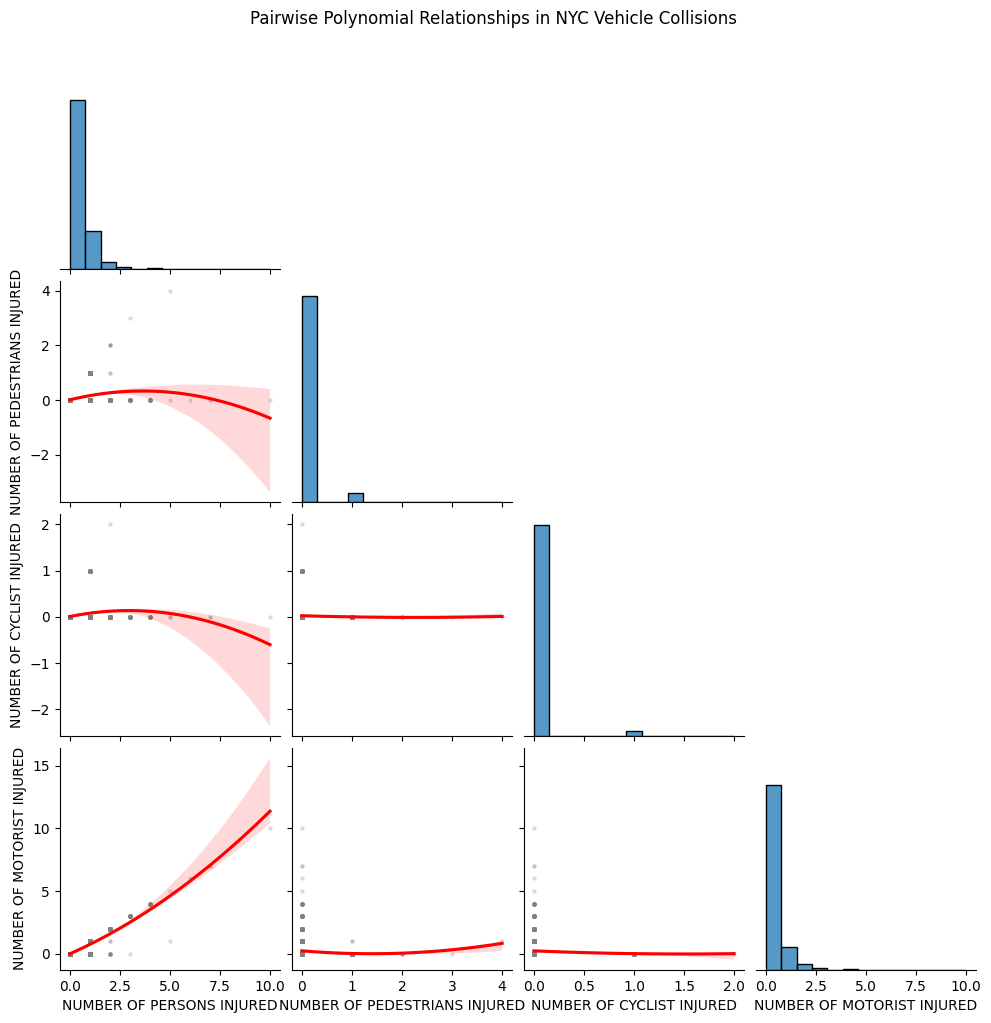

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF MOTORIST INJURED"
]

# Drop NA + sample
df_sample = df[cols].dropna().sample(n=3000, random_state=42)

g = sns.pairplot(
    df_sample,
    kind="reg",
    corner=True,
    diag_kind="hist",
    plot_kws={
        "order": 2,  # quadratic regression
        "line_kws": {"color": "red"},
        "scatter_kws": {"alpha": 0.2, "color": "gray", "s": 5}
    },
    height=2.5
)

g.fig.suptitle("Pairwise Polynomial Relationships in NYC Vehicle Collisions", y=1.02)
plt.show()


### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

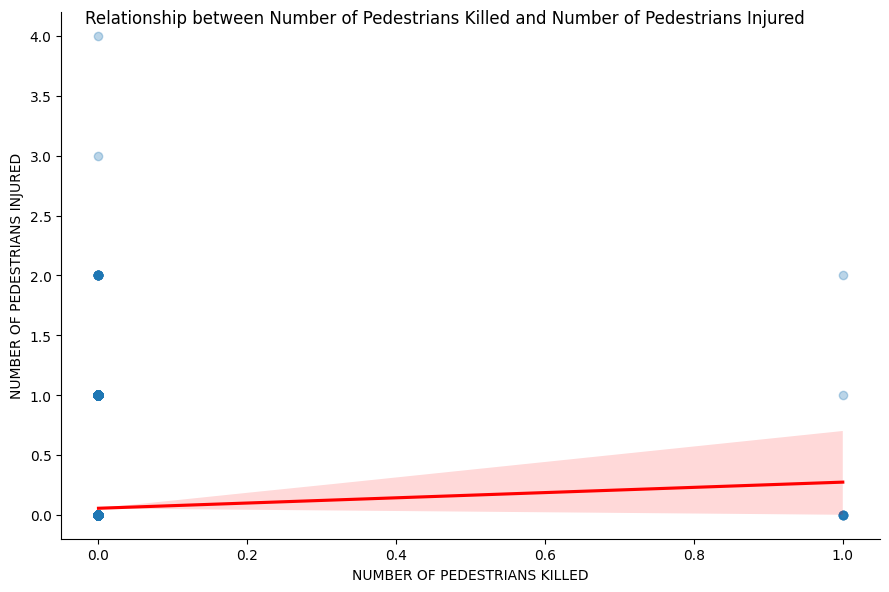

In [ ]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt
#df.info()
#print(df.shape)
df_2 = df.dropna(axis=1)  #drop columns with NA if rows no data left
#df_2.shape
#df_2.info()
#df_2.describe()


df_sample = df_2.sample(n=10000, random_state=42)

sns.lmplot(data=df_sample,
           y="NUMBER OF PEDESTRIANS INJURED",
           x="NUMBER OF PEDESTRIANS KILLED",
           height=6,
           aspect=1.5,
           line_kws={"color": "red"},   # regression line
           scatter_kws={"alpha": 0.3})   # make points transparent)
plt.suptitle("Relationship between Number of Pedestrians Killed and Number of Pedestrians Injured")
plt.show()


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

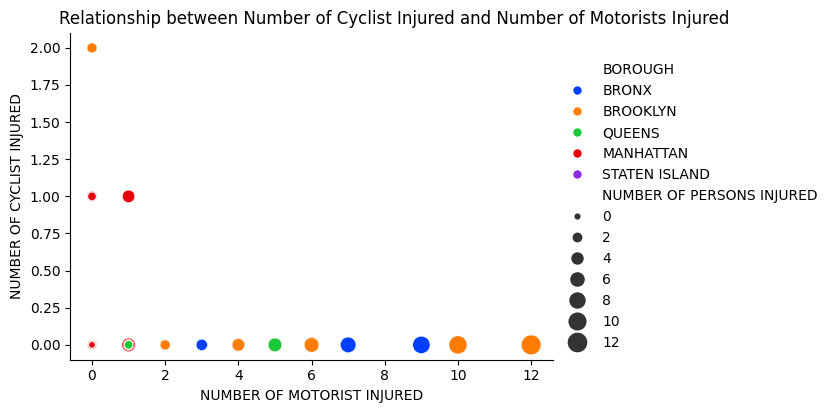

In [ ]:
df_2 = df.dropna(subset=["NUMBER OF MOTORIST INJURED", "NUMBER OF CYCLIST INJURED"])

df_sample = df_2.sample(n=10000, random_state=42)

g = sns.relplot(
    data=df_sample,
    x="NUMBER OF MOTORIST INJURED",
    y="NUMBER OF CYCLIST INJURED",
    height=4,
    aspect=1.5,
    #line_kws={"color": "red"},
    #scatter_kws={"alpha": 0.3},
    #alpha=0.3,
    hue="BOROUGH",
    size="NUMBER OF PERSONS INJURED",
    palette="bright",
    sizes=(20, 200)
    #fit_reg=False
)
g.fig.suptitle("Relationship between Number of Cyclist Injured and Number of Motorists Injured", y=1.02)
plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

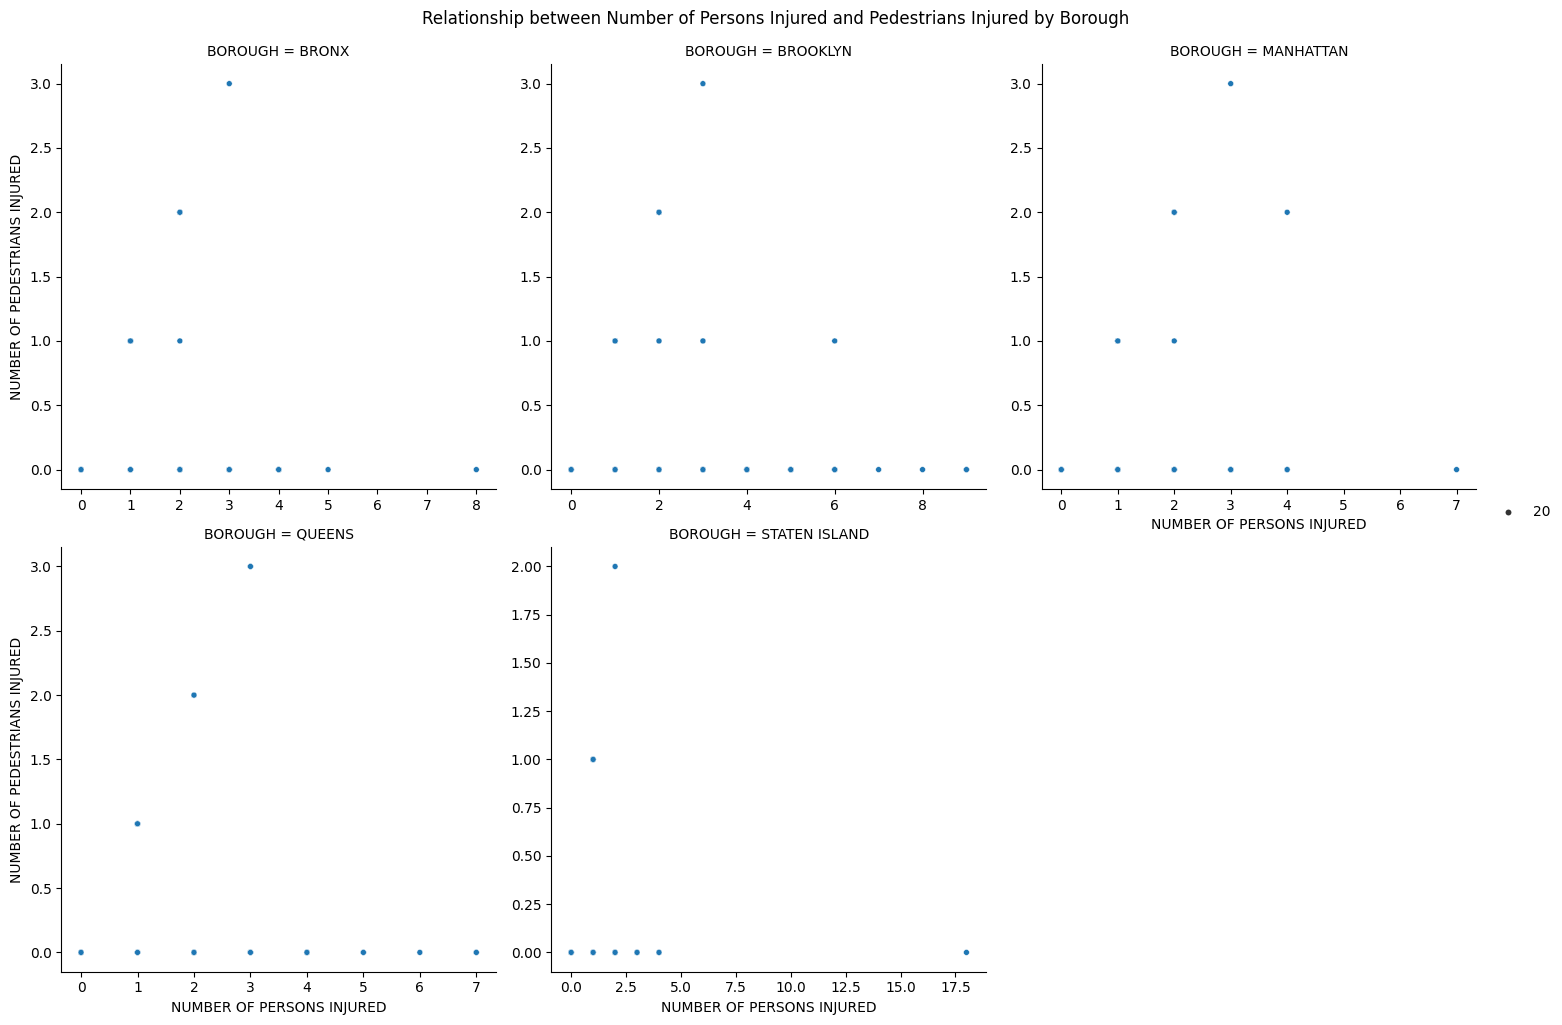

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plot_df = df[["CRASH DATE", "CRASH TIME", "NUMBER OF PERSONS INJURED",
              "NUMBER OF PEDESTRIANS INJURED", "BOROUGH"]].dropna()

plot_df_sampled = plot_df.sample(n=10000, random_state=42).copy()

plot_df_sampled["CRASH DATETIME"] = pd.to_datetime(
    plot_df_sampled["CRASH DATE"] + " " + plot_df_sampled["CRASH TIME"]
)

sns.relplot(
    data=plot_df_sampled,
    x="NUMBER OF PERSONS INJURED",
    y="NUMBER OF PEDESTRIANS INJURED",
    col="BOROUGH",
    col_wrap=3, # 3 plots per row
    height=5,
    size=20,
    facet_kws={'sharey': False, 'sharex': False}
)

plt.suptitle("Relationship between Number of Persons Injured and Pedestrians Injured by Borough", y=1.02)
plt.show()